In [1]:
from matplotlib import pyplot as plt
from afinn import Afinn
import numpy as np
afinn = Afinn()
%matplotlib inline

In [2]:
import pandas as pd
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
from gutenberg.query import get_etexts
from gutenberg.query import get_metadata


In [3]:
BOOK_ID = 74
CHAPTER_RE = '^CHAPTER [DIVCXL]*$'

In [4]:
book_text = strip_headers(load_etext(BOOK_ID, mirror = 'http://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/')).strip()
book_text = book_text.replace('nigger', '')
book_text = book_text.replace('Nigger', '')
book_text = book_text.replace('Buck', '')

In [5]:
print(book_text)

THE ADVENTURES OF TOM SAWYER


By Mark Twain

(Samuel Langhorne Clemens)




CONTENTS


CHAPTER I. Y-o-u-u Tom-Aunt Polly Decides Upon her Duty—Tom Practices
Music—The Challenge—A Private Entrance

CHAPTER II. Strong Temptations—Strategic Movements—The Innocents
Beguiled

CHAPTER III. Tom as a General—Triumph and Reward—Dismal
Felicity—Commission and Omission

CHAPTER IV. Mental Acrobatics—Attending Sunday—School—The
Superintendent—“Showing off”—Tom Lionized

CHAPTER V. A Useful Minister—In Church—The Climax

CHAPTER VI. Self-Examination—Dentistry—The Midnight Charm—Witches and
Devils—Cautious Approaches—Happy Hours

CHAPTER VII. A Treaty Entered Into—Early Lessons—A Mistake Made

CHAPTER VIII. Tom Decides on his Course—Old Scenes Re-enacted

CHAPTER IX. A Solemn Situation—Grave Subjects Introduced—Injun Joe
Explains

CHAPTER X. The Solemn Oath—Terror Brings Repentance—Mental Punishment

CHAPTER XI. Muff Potter Comes Himself—Tom’s Conscience at Work

CHAPTER XII. Tom Shows his Generosi

In [6]:
import re
book_lines = book_text.splitlines()
lines_df = pd.DataFrame({
    "content": book_lines,
    "line": list(range(len(book_lines)))
})
lines_df.head(n=70)


,content,line
0,THE ADVENTURES OF TOM SAWYER,0
1,,1
2,,2
3,By Mark Twain,3
4,,4
...,...,...
65,CHAPTER XXII. Tom’s Confidence Betrayed—Expect...,65
66,,66
67,CHAPTER XXIII. Old Muff’s Friends—Muff Potter ...,67
68,Saved,68


In [7]:
print(afinn.score(book_text))

-361.0


In [8]:
def get_chapter_for_lines(dataframe):
    chapters = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search(CHAPTER_RE, row['content'], re.IGNORECASE):
            curr_chapter += 1
        chapters.append(curr_chapter)
        
    return chapters

In [9]:
chapters = get_chapter_for_lines(lines_df)


In [10]:
lines_df['chapter'] = chapters

In [11]:
#sense_sensibility_df.shape

In [12]:
#afinn.score(str(list(book_df[book_df.chapter==24]['content'])))

In [13]:
import nltk
nltk.download('punkt')
from tidytext import unnest_tokens
words_df = (unnest_tokens(lines_df, "word", "content"))
words_df = words_df.reset_index()
words_df = words_df.drop(columns=['index'])
words_df = words_df[words_df.word.notnull()]
words_df = words_df.reset_index()
words_df = words_df.drop(columns=['index'])
words_df

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

,line,chapter,word
0,0,0,the
1,0,0,adventures
2,0,0,of
3,0,0,tom
4,0,0,sawyer
...,...,...,...
78536,8870,35,of
78537,8870,35,their
78538,8870,35,lives
78539,8870,35,at


In [14]:
def sign(number):
    return -1 if number < 0 else 1
word_scores = [afinn.score(word) for word in words_df['word']]
word_squared = [sign(afinn.score(word)) * afinn.score(word) * afinn.score(word) for word in words_df['word']]

In [15]:
words_df['word_score'] = word_scores
words_df['word_score_squared'] = word_squared
words_df

,line,chapter,word,word_score,word_score_squared
0,0,0,the,0.0,0.0
1,0,0,adventures,2.0,4.0
2,0,0,of,0.0,0.0
3,0,0,tom,0.0,0.0
4,0,0,sawyer,0.0,0.0
...,...,...,...,...,...
78536,8870,35,of,0.0,0.0
78537,8870,35,their,0.0,0.0
78538,8870,35,lives,0.0,0.0
78539,8870,35,at,0.0,0.0


In [16]:
from siuba import *
grouped_book = group_by(words_df, 'chapter')
summarized_book = summarize(grouped_book, chapter_score = _.word_score.sum())
summarized_book

,chapter,chapter_score
0,0,-9.0
1,1,-21.0
2,2,37.0
3,3,29.0
4,4,124.0
5,5,8.0
6,6,-3.0
7,7,36.0
8,8,-45.0
9,9,-86.0


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


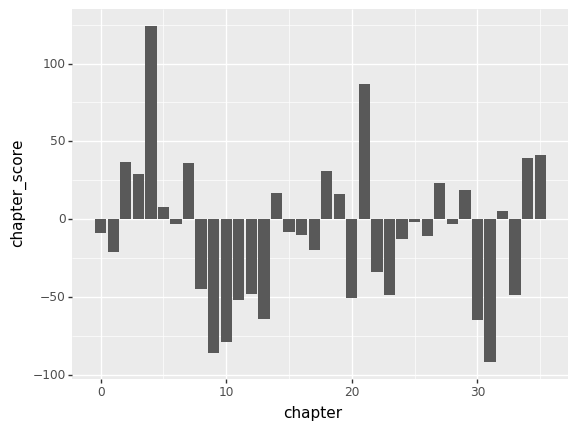

<ggplot: (-9223371953246763316)>

In [17]:
import pandas as pd
from plotnine import *

(ggplot(summarized_book)         # defining what data to use
 + aes(x='chapter', y='chapter_score')    # defining what variable to use
 + geom_bar(stat='identity') # defining the type of plot to use
)

In [18]:
summarized_book_positive = summarize(filter(grouped_book, _.word_score >= 0), chapter_score = _.word_score.sum())
summarized_book_negative = summarize(filter(grouped_book, _.word_score <= 0), chapter_score = _.word_score.sum())


In [19]:
#(ggplot(summarized_book_positive)         # defining what data to use
# + aes(x='chapter', y='chapter_score')    # defining what variable to use
# + geom_bar(stat='identity') # defining the type of plot to use
#)

In [20]:
#(ggplot(summarized_book_negative)         # defining what data to use
# + aes(x='chapter', y='chapter_score')    # defining what variable to use
# + geom_bar(stat='identity') # defining the type of plot to use
#)

In [21]:
summarized_book_positive.head(10)

,chapter,chapter_score
0,0,101.0
1,1,125.0
2,2,124.0
3,3,165.0
4,4,273.0
5,5,108.0
6,6,219.0
7,7,144.0
8,8,78.0
9,9,76.0


In [22]:
from nrclex import NRCLex
text_object = NRCLex(book_text)
#text_object.lexicon


In [23]:
text_object.top_emotions

[('positive', 0.1813810348143874)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

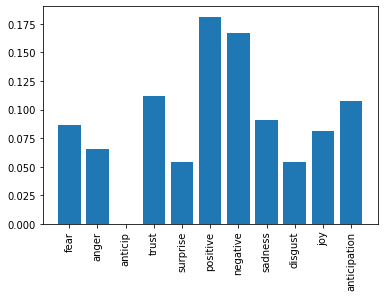

In [24]:
D = text_object.affect_frequencies
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation = 90)

In [25]:
list_sentiments = [NRCLex(elem).top_emotions for elem in words_df['word']]
#print(list_sentiments[100])

In [26]:
sentiments = [elem[0] for elem in list_sentiments]
sentiments_words_df = words_df.assign(sentiment = sentiments)
sentiments_words_df.head()

,line,chapter,word,word_score,word_score_squared,sentiment
0,0,0,the,0.0,0.0,"(fear, 0.0)"
1,0,0,adventures,2.0,4.0,"(fear, 0.0)"
2,0,0,of,0.0,0.0,"(fear, 0.0)"
3,0,0,tom,0.0,0.0,"(fear, 0.0)"
4,0,0,sawyer,0.0,0.0,"(fear, 0.0)"


In [27]:
sentiments_words_df = sentiments_words_df[sentiments_words_df.apply(lambda row: row['sentiment'][1] > 0.0, axis = 1)]
sentiments_words_df

,line,chapter,word,word_score,word_score_squared,sentiment
62,25,0,climax,0.0,0.0,"(trust, 0.2)"
79,30,0,mistake,-2.0,-4.0,"(negative, 0.5)"
106,37,0,punishment,0.0,0.0,"(fear, 0.25)"
109,39,0,muff,0.0,0.0,"(anger, 0.3333333333333333)"
115,39,0,conscience,0.0,0.0,"(trust, 0.5)"
...,...,...,...,...,...,...
78491,8867,35,prosperous,3.0,9.0,"(positive, 0.5)"
78493,8867,35,happy,3.0,9.0,"(trust, 0.25)"
78499,8867,35,worth,2.0,4.0,"(positive, 1.0)"
78508,8868,35,younger,0.0,0.0,"(positive, 1.0)"


In [28]:
test_per_chapter = words_df.groupby('chapter').agg({'line':'first', 
                             'word': ', '.join, 
                             'word_score':'sum' }).reset_index()

In [29]:
test_per_chapter

,chapter,line,word,word_score
0,0,0,"the, adventures, of, tom, sawyer, by, mark, tw...",-9.0
1,1,459,"chapter, i, “, tom, ”, no, answer, “, tom, ”, ...",-21.0
2,2,814,"chapter, ii, saturday, morning, was, come, and...",37.0
3,3,1037,"chapter, iii, tom, presented, himself, before,...",29.0
4,4,1257,"chapter, iv, the, sun, rose, upon, a, tranquil...",124.0
5,5,1623,"chapter, v, about, halfpast, ten, the, cracked...",8.0
6,6,1797,"chapter, vi, monday, morning, found, tom, sawy...",-3.0
7,7,2308,"chapter, vii, the, harder, tom, tried, to, fas...",36.0
8,8,2572,"chapter, viii, tom, dodged, hither, and, thith...",-45.0
9,9,2766,"chapter, ix, at, halfpast, nine, that, night, ...",-86.0


In [30]:
def plot_emotion(emotion):
    my_emotion_list = [NRCLex(elem).raw_emotion_scores[emotion] if emotion in NRCLex(elem).raw_emotion_scores else 0 for elem in test_per_chapter['word']]
    plt.plot(my_emotion_list)
    plt.xlabel('Chapter')
    plt.ylabel(f'{emotion} occurrences')


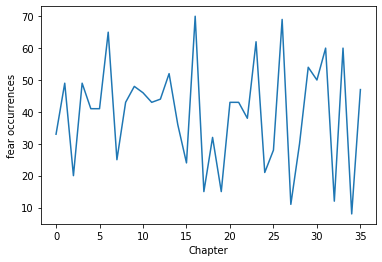

In [31]:
plot_emotion('fear')

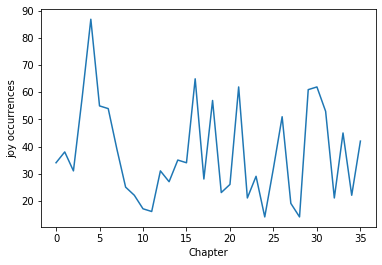

In [32]:
plot_emotion('joy')

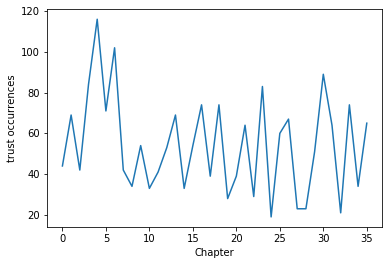

In [33]:
plot_emotion('trust')

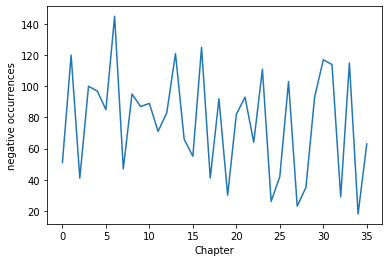

In [34]:
plot_emotion('negative')

In [35]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores('Yay')
scores


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}

In [36]:
list_nltk_sentiments = ['positive' if sia.polarity_scores(word)['compound'] > 0 else 'negative' if sia.polarity_scores(word)['compound'] < 0 else 'neutral' for word in sentiments_words_df['word']]


In [37]:
list_nltk_compound = [sia.polarity_scores(word)['compound'] for word in sentiments_words_df['word']]

In [38]:
sentiments_words_df['nltk_sentiment'] = list_nltk_sentiments
sentiments_words_df['nltk_compound_score'] = list_nltk_compound
sentiments_words_df

,line,chapter,word,word_score,word_score_squared,sentiment,nltk_sentiment,nltk_compound_score
62,25,0,climax,0.0,0.0,"(trust, 0.2)",neutral,0.0000
79,30,0,mistake,-2.0,-4.0,"(negative, 0.5)",negative,-0.3400
106,37,0,punishment,0.0,0.0,"(fear, 0.25)",negative,-0.4939
109,39,0,muff,0.0,0.0,"(anger, 0.3333333333333333)",neutral,0.0000
115,39,0,conscience,0.0,0.0,"(trust, 0.5)",neutral,0.0000
...,...,...,...,...,...,...,...,...
78491,8867,35,prosperous,3.0,9.0,"(positive, 0.5)",positive,0.4767
78493,8867,35,happy,3.0,9.0,"(trust, 0.25)",positive,0.5719
78499,8867,35,worth,2.0,4.0,"(positive, 1.0)",positive,0.2263
78508,8868,35,younger,0.0,0.0,"(positive, 1.0)",neutral,0.0000


In [39]:
chapter_scores_nltk = sentiments_words_df.groupby('chapter').agg({'nltk_compound_score' : 'sum'})
chapter_scores_afinn = sentiments_words_df.groupby('chapter').agg({'word_score' : 'sum'})
chapter_scores_afinn_squared = sentiments_words_df.groupby('chapter').agg({'word_score_squared' : 'sum'})
chapters_df = count(filter(sentiments_words_df, _.nltk_sentiment != 'neutral'), 'chapter', 'nltk_sentiment')
#chapters_df

In [40]:
chapters_df.loc[chapters_df['nltk_sentiment'] == 'negative', 'n'] *= -1
#chapters_df

In [41]:
chapters_df_sentiment = chapters_df.groupby('chapter').agg({'n':'sum'})
chapters_df_sentiment.reset_index()
chapters_df_sentiment['nltk_score'] = chapter_scores_nltk
chapters_df_sentiment['afinn_score'] = chapter_scores_afinn
chapters_df_sentiment['afinn_score_squared'] = chapter_scores_afinn_squared
chapters_df_sentiment

,n,nltk_score,afinn_score,afinn_score_squared
chapter,,,,
0,-2,-1.0677,-14.0,-24.0
1,-13,-4.5200,-27.0,-47.0
2,14,6.6747,41.0,133.0
3,3,4.0134,20.0,84.0
4,40,19.3588,58.0,138.0
5,2,2.4030,11.0,51.0
6,-2,-1.2021,-19.0,-9.0
7,9,5.1099,11.0,45.0
8,-10,-4.1310,-25.0,-51.0


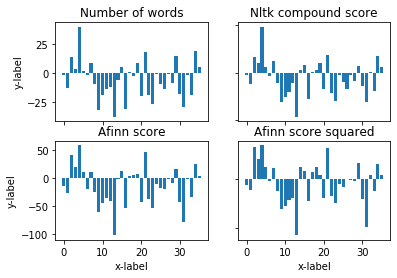

In [42]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(chapters_df_sentiment.index, chapters_df_sentiment['n'])
axs[0, 0].set_title('Number of words')
axs[0, 1].bar(chapters_df_sentiment.index, chapters_df_sentiment['nltk_score'])
axs[0, 1].set_title('Nltk compound score')
axs[1, 0].bar(chapters_df_sentiment.index, chapters_df_sentiment['afinn_score'])
axs[1, 0].set_title('Afinn score')
axs[1, 1].bar(chapters_df_sentiment.index, chapters_df_sentiment['afinn_score_squared'])
axs[1, 1].set_title('Afinn score squared')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [43]:
#diff_sign = [not(sign(chapters_df_sentiment.loc[chapter, 'afinn_score']) == sign(chapters_df_sentiment.loc[chapter, 'afinn_score_squared'])) for chapter in chapters_df_sentiment.index]
#chapters_df_sentiment.loc[diff_sign, ['afinn_score', 'afinn_score_squared']]
diff_of_scores = [(abs(chapters_df_sentiment.loc[chapter, 'afinn_score'] - chapters_df_sentiment.loc[chapter, 'afinn_score_squared']), chapter) for chapter in chapters_df_sentiment.index]
diff_of_scores.sort(reverse = True)
top_chapter = diff_of_scores[0][1]
print(f'Top difference chapter: {top_chapter}')
#print(diff_of_scores)
#print(diff_sign)
#afinn_diff_sign_chapters = set(chapters_df_sentiment[diff_sign].index.copy())
#print(afinn_diff_sign_chapters)
diff_sign_chapters_df = sentiments_words_df[sentiments_words_df.apply(lambda row: row['chapter'] == top_chapter, axis = 1)]
print(diff_sign_chapters_df.groupby(['chapter', 'word']).size().sort_values().tail(10))

Top difference chapter: 13
chapter  word      
13       thought        4
         fire           4
         black          4
         bluff          4
         avenger        4
         conscience     4
         hermit         5
         pirate         6
         sir            7
         don           10
dtype: int64


In [44]:
positive_contribution = (sentiments_words_df
  >> filter(_.nltk_sentiment == 'positive')
  >> count(_.word, sort=True)
).head(10)
positive_contribution

,word,n
0,good,100
1,hope,30
2,interest,23
3,kind,23
4,ready,20
5,treasure,19
6,glad,19
7,chance,18
8,pretty,17
9,happy,16


In [45]:
negative_contribution = (sentiments_words_df
  >> filter(_.nltk_sentiment == 'negative')
  >> count(_.word, sort=True)
).head(10)
negative_contribution

,word,n
0,awful,39
1,lost,33
2,fire,25
3,broke,22
4,kill,21
5,warn,18
6,fool,17
7,leave,16
8,cry,16
9,bad,16


In [46]:
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
tokenizer.train(book_text)
sentences = tokenizer.tokenize(book_text)
sentences_score = [afinn.score(sentence) for sentence in sentences]

In [47]:
sentences_df = pd.DataFrame({'sentence': sentences, 'sentence_score': sentences_score})
sentences_df

,sentence,sentence_score
0,THE ADVENTURES OF TOM SAWYER\r\n\r\n\r\nBy Mar...,1.0
1,Strong Temptations—Strategic Movements—The Inn...,2.0
2,Tom as a General—Triumph and Reward—Dismal\r\n...,4.0
3,Mental Acrobatics—Attending Sunday—School—The\...,2.0
4,Self-Examination—Dentistry—The Midnight Charm—...,5.0
...,...,...
3716,"I’ll stick to the widder till I rot, Tom; and ...",0.0
3717,"It being strictly a history of a _boy_, it\r\n...",-1.0
3718,"When one writes a novel about grown people, he...",3.0
3719,Most of the characters that perform in this bo...,6.0


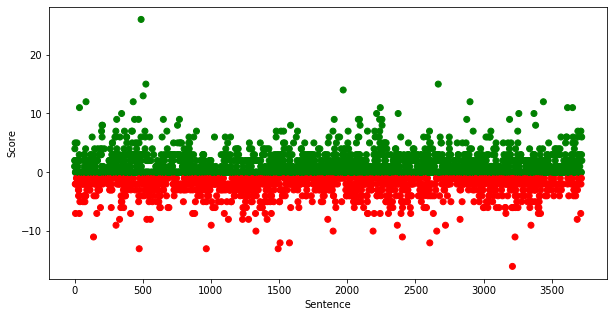

In [48]:
fig = plt.figure(figsize = (10, 5))
colors = np.where(np.array(sentences_score) < 0, 'red', 'green')
plt.scatter(sentences_df.index, sentences_score, c = colors)
plt.xlabel('Sentence')
plt.ylabel('Score')
plt.show()

In [49]:
top_positive_sentences = sentences_df.sort_values(by = 'sentence_score', ascending = False)['sentence'][:10]
for sentence in top_positive_sentences:
    print(sentence + '\n-----\n')

And you never can
be sorry for the trouble you took to learn them; for knowledge is worth
more than anything there is in the world; it’s what makes great men
and good men; you’ll be a great man and a good man yourself, some
day, Thomas, and then you’ll look back and say, It’s all owing to the
precious Sunday-school privileges of my boyhood—it’s all owing to
my dear teachers that taught me to learn—it’s all owing to the good
superintendent, who encouraged me, and watched over me, and gave me a
beautiful Bible—a splendid elegant Bible—to keep and have it all for my
own, always—it’s all owing to right bringing up!
-----

Six hundred and fifty in silver’s
something to carry.”

“Well—all right—it won’t matter to come here once more.”

“No—but I’d say come in the night as we used to do—it’s better.”

“Yes: but look here; it may be a good while before I get the right
chance at that job; accidents might happen; ’tain’t in such a very good
place; we’ll just regularly bury it—and bury it deep.”


In [50]:
top_negative_sentences = sentences_df.sort_values(by = 'sentence_score', ascending = True)['sentence'][:10]
for sentence in top_negative_sentences:
    print(sentence + '\n-----\n')

He still said it was “all right,” but
there was such a leaden dread at his heart that the words had lost their
ring and sounded just as if he had said, “All is lost!” Becky clung to
his side in an anguish of fear, and tried hard to keep back the tears,
but they would come.
-----

And at last Joe,
representing a whole tribe of weeping outlaws, dragged him sadly forth,
gave his bow into his feeble hands, and Tom said, “Where this arrow
falls, there bury poor Robin Hood under the greenwood tree.” Then he
shot the arrow and fell back and would have died, but he lit on a nettle
and sprang up too gaily for a corpse.
-----

Presently Huck said:

“What does pirates have to do?”

Tom said:

“Oh, they have just a bully time—take ships and burn them, and get the
money and bury it in awful places in their island where there’s ghosts
and things to watch it, and kill everybody in the ships—make ’em walk a
plank.”

“And they carry the women to the island,” said Joe; “they don’t kill the
women.”

“No,

In [51]:
test_per_chapter

,chapter,line,word,word_score
0,0,0,"the, adventures, of, tom, sawyer, by, mark, tw...",-9.0
1,1,459,"chapter, i, “, tom, ”, no, answer, “, tom, ”, ...",-21.0
2,2,814,"chapter, ii, saturday, morning, was, come, and...",37.0
3,3,1037,"chapter, iii, tom, presented, himself, before,...",29.0
4,4,1257,"chapter, iv, the, sun, rose, upon, a, tranquil...",124.0
5,5,1623,"chapter, v, about, halfpast, ten, the, cracked...",8.0
6,6,1797,"chapter, vi, monday, morning, found, tom, sawy...",-3.0
7,7,2308,"chapter, vii, the, harder, tom, tried, to, fas...",36.0
8,8,2572,"chapter, viii, tom, dodged, hither, and, thith...",-45.0
9,9,2766,"chapter, ix, at, halfpast, nine, that, night, ...",-86.0


In [52]:
top_positive_chapter = test_per_chapter.sort_values(by = "word_score", ascending = False).iloc[0, 0]
#print(str(top_positive_chapter))

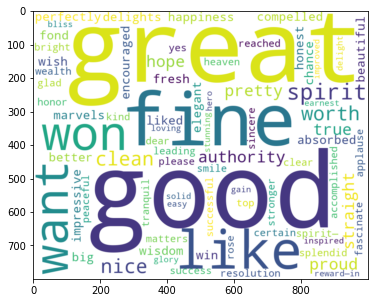

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
positive_words = dict(filter(filter(words_df, _.chapter == top_positive_chapter), _.word_score > 0.0)['word'].value_counts())
#print(positive_words)
wordcloud = WordCloud(background_color='white', width=1000, height=800).generate_from_frequencies(positive_words)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


In [54]:
top_negative_chapter = test_per_chapter.sort_values(by = "word_score", ascending = True).iloc[0, 0]
#print(str(top_negative_chapter))
words_df

,line,chapter,word,word_score,word_score_squared
0,0,0,the,0.0,0.0
1,0,0,adventures,2.0,4.0
2,0,0,of,0.0,0.0
3,0,0,tom,0.0,0.0
4,0,0,sawyer,0.0,0.0
...,...,...,...,...,...
78536,8870,35,of,0.0,0.0
78537,8870,35,their,0.0,0.0
78538,8870,35,lives,0.0,0.0
78539,8870,35,at,0.0,0.0


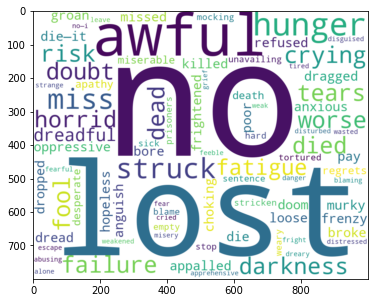

In [55]:
negative_words = dict(filter(filter(words_df, _.chapter == top_negative_chapter), _.word_score < 0.0)['word'].value_counts())
#print(negative_words)
wordcloud = WordCloud(background_color='white', width=1000, height=800).generate_from_frequencies(negative_words)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
